In [1]:
import pandas as pd
import graphviz
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import tree
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
from io import StringIO
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus




In [2]:
data = pd.read_csv('winequality_red.csv')
data.iloc[300:350]

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
300            7.5             0.530         0.06            2.60      0.086   
301           11.1             0.180         0.48            1.50      0.068   
302            8.3             0.705         0.12            2.60      0.092   
303            7.4             0.670         0.12            1.60      0.186   
304            8.4             0.650         0.60            2.10      0.112   
305           10.3             0.530         0.48            2.50      0.063   
306            7.6             0.620         0.32            2.20      0.082   
307           10.3             0.410         0.42            2.40      0.213   
308           10.3             0.430         0.44            2.40      0.214   
309            7.4             0.290         0.38            1.70      0.062   
310           10.3             0.530         0.48            2.50      0.063   
311            7.9             0.530         0.24            2.00      0.072   
312            9.0             0.460         0.31            2.80      0.093   
313            8.6             0.470         0.30            3.00      0.076   
314            7.4             0.360         0.29            2.60      0.087   
315            7.1             0.350         0.29            2.50      0.096   
316            9.6             0.560         0.23            3.40      0.102   
317            9.6             0.770         0.12            2.90      0.082   
318            9.8             0.660         0.39            3.20      0.083   
319            9.6             0.770         0.12            2.90      0.082   
320            9.8             0.660         0.39            3.20      0.083   
321            9.3             0.610         0.26            3.40      0.090   
322            7.8             0.620         0.05            2.30      0.079   
323           10.3             0.590         0.42            2.80      0.090   
324           10.0             0.490         0.20           11.00      0.071   
325           10.0             0.490         0.20           11.00      0.071   
326           11.6             0.530         0.66            3.65      0.121   
327           10.3             0.440         0.50            4.50      0.107   
328           13.4             0.270         0.62            2.60      0.082   
329           10.7             0.460         0.39            2.00      0.061   
330           10.2             0.360         0.64            2.90      0.122   
331           10.2             0.360         0.64            2.90      0.122   
332            8.0             0.580         0.28            3.20      0.066   
333            8.4             0.560         0.08            2.10      0.105   
334            7.9             0.650         0.01            2.50      0.078   
335           11.9             0.695         0.53            3.40      0.128   
336            8.9             0.430         0.45            1.90      0.052   
337            7.8             0.430         0.32            2.80      0.080   
338           12.4             0.490         0.58            3.00      0.103   
339           12.5             0.280         0.54            2.30      0.082   
340           12.2             0.340         0.50            2.40      0.066   
341           10.6             0.420         0.48            2.70      0.065   
342           10.9             0.390         0.47            1.80      0.118   
343           10.9             0.390         0.47            1.80      0.118   
344           11.9             0.570         0.50            2.60      0.082   
345            7.0             0.685         0.00            1.90      0.067   
346            6.6             0.815         0.02            2.70      0.072   
347           13.8             0.490         0.67            3.00      0.093   
348            9.6             0.560         0.31            2.80      0.089   
349  

quality is my label

In [3]:
data.describe()

fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1599.000000       1599.000000  1599.000000     1599.000000   
mean        8.319637          0.527821     0.270976        2.538806   
std         1.741096          0.179060     0.194801        1.409928   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1599.000000          1599.000000           1599.000000  1599.000000   
mean      0.087467            15.874922             46.467792     0.996747   
std       0.047065            10.460157             32.895324     0.001887   
min       0.012000             1.000000              6.000000     0.990070   
25%       0.070000             7.000000             22.000000     0.995600   
50%       0.079000            14.000000             38.000000     0.996750   
75%       0.090000            21.000000             62.000000     0.997835   
max       0.611000            72.000000            289.000000     1.003690   

                pH    sulphates      alcohol      quality  
count  1599.000000  1599.000000  1599.000000  1599.000000  
mean      3.311113     0.658149    10.422983     5.636023  
std       0.154386     0.169507     1.065668     0.807569  
min       2.740000     0.330000     8.400000     3.000000  
25%       3.210000     0.550000     9.500000     5.000000  
50%       3.310000     0.620000    10.200000     6.000000  
75%       3.400000     0.730000    11.100000     6.000000  
max       4.010000     2.000000    14.900000     8.000000

from "count" i can say that i have all the values in the columns

In [4]:
data.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [5]:
# separating the input feratures from the label
X = data.drop('quality', axis=1)
y = data['quality']

In [6]:
# splitting the data for training and testing
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=355)

In [7]:
x_test

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
693             9.0             0.480         0.32             2.8      0.084   
160             7.6             0.950         0.03             2.0      0.090   
612             7.5             0.640         0.00             2.4      0.077   
604             8.3             0.580         0.13             2.9      0.096   
376            11.5             0.450         0.50             3.0      0.078   
...             ...               ...          ...             ...        ...   
1255            6.1             0.640         0.02             2.4      0.069   
262             8.0             0.520         0.03             1.7      0.070   
704             9.1             0.765         0.04             1.6      0.078   
1146            7.8             0.500         0.12             1.8      0.178   
1020           11.3             0.360         0.66             2.4      0.123   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
693                  21.0                 122.0  0.99840  3.32       0.62   
160                   7.0                  20.0  0.99590  3.20       0.56   
612                  18.0                  29.0  0.99650  3.32       0.60   
604                  14.0                  63.0  0.99840  3.17       0.62   
376                  19.0                  47.0  1.00030  3.26       1.11   
...                   ...                   ...      ...   ...        ...   
1255                 26.0                  46.0  0.99358  3.47       0.45   
262                  10.0                  35.0  0.99575  3.34       0.57   
704                   4.0                  14.0  0.99800  3.29       0.54   
1146                  6.0                  21.0  0.99600  3.28       0.87   
1020                  3.0                   8.0  0.99642  3.20       0.53   

      alcohol  
693       9.4  
160       9.6  
612      10.0  
604       9.1  
376      11.0  
...       ...  
1255     11.0  
262      10.0  
704       9.7  
1146      9.8  
1020     11.9  

[480 rows x 11 columns]

## without any preprocessing of the data, lets first visualize the data


In [8]:
clf = DecisionTreeClassifier()
#clf = DecisionTreeClassifier(max_depth=4)

clf.fit(x_train,y_train)

DecisionTreeClassifier()

In [9]:
s = set(y_train)
s

{3, 4, 5, 6, 7, 8}

In [10]:
# inserting the class label and the input features inside a list
class_name = list(y_train.unique())
feature_names = list(x_train.columns)
print(feature_names)
print(class_name)

['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']
[7, 5, 3, 6, 4, 8]


In [11]:
# create a dot_file which stores the tree structure
dot_data = export_graphviz(clf,feature_names = feature_names,rounded = True,filled = True)
# Draw graph
graph = pydotplus.graph_from_dot_data(dot_data)  
graph.write_png("myTree.png")
# Show graph
Image(graph.create_png())

In [12]:
clf.score(x_train,y_train)

1.0

In [13]:
py_pred = clf.predict(x_test)

In [14]:
clf.score(x_test, y_test)

0.625

## hyperparameter tuning
i want to find the set and values of hyperparameters which will give the model a high accuracy

In [15]:
# scalling the data
scalar = StandardScaler()
x_transform = scalar.fit_transform(X)

In [16]:
x_train, x_test, y_train, y_test = train_test_split(x_transform, y, test_size=0.30, random_state=355)

In [17]:
# evaluating the score of the model from the test data
clf.score(x_test, y_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


0.1625

In [18]:
# a dictonary of the grid param
grid_param = {
    'criterion' : ['gini', 'entropy'],
    'max_depth': range(2,32,1),
    'min_samples_leaf' : range(1,10,1),
    'min_samples_split' : range(2,10,1),
    'splitter' : ['best', 'random']
}

In [19]:
grid_search = GridSearchCV(estimator=clf, 
                          param_grid=grid_param,
                          cv=5,
                          n_jobs=-1)

i have set n_jobs=-1 to allow sklearn to detect the number of cores and cpu in the machine and effeciently utilize them to do the jobs automatically.

In [20]:
grid_search.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(2, 32),
                         'min_samples_leaf': range(1, 10),
                         'min_samples_split': range(2, 10),
                         'splitter': ['best', 'random']})

In [21]:
best_parameters = grid_search.best_params_
print(best_parameters)

{'criterion': 'entropy', 'max_depth': 7, 'min_samples_leaf': 4, 'min_samples_split': 6, 'splitter': 'random'}


In [22]:
grid_search.best_score_

0.6094690903267136

In [34]:
# feeding the best parameters into the model

clf = DecisionTreeClassifier(criterion = 'entropy', max_depth = 7, min_samples_leaf = 4, min_samples_split =6, splitter= 'random')
#clf = DecisionTreeClassifier(criterion = 'entropy', max_depth =6, min_samples_leaf= 9, min_samples_split= 3, splitter ='random')
clf.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=7, min_samples_leaf=4,
                       min_samples_split=6, splitter='random')

In [35]:
# checking on the score after using the hyperparameters
clf.score(x_train, y_train)

0.6407506702412868

In [36]:
clf.score(x_test, y_test)

0.5375

In [37]:
class_name

[3, 4, 5, 6, 7, 8]

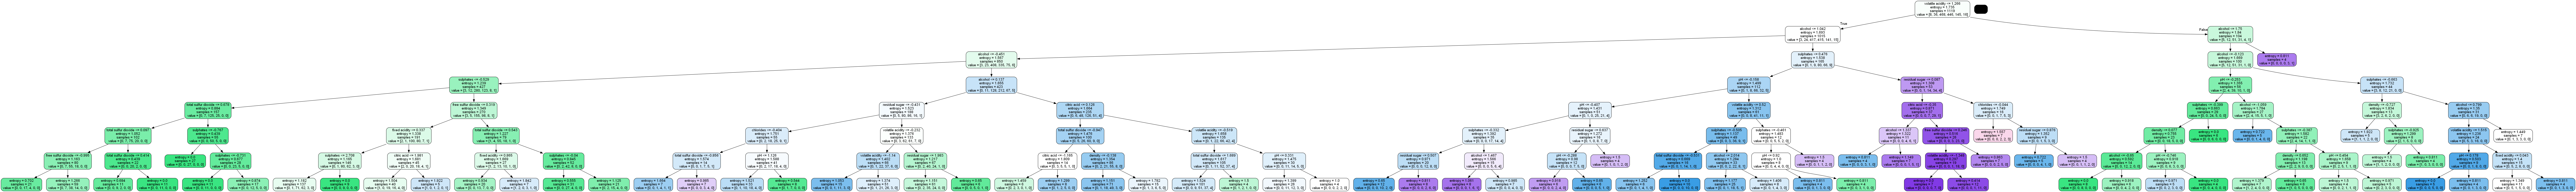

In [38]:
#visualizing the tree
feature_name = X.columns
class_name = list(set(y_train))

# create a dot-file which stores the tree structure
dot_data = export_graphviz(clf, feature_names=feature_name, rounded=True, filled=True)

# draw a graph 
graph = pydotplus.graph_from_dot_data(dot_data)
graph.write_png("mytree1.png")

# show graph
Image(graph.create_png())

In [39]:
# saving the model into the file
import pickle
with open("DecisionTreeModel", 'wb') as file:
    pickle.dump(clf, file)
    file.close()

In [40]:
# loading the model that have been saved
with open("DecisionTreeModel", 'rb') as file:
    loaded_model = pickle.load(file)
    file.close()

In [41]:
input_data = [0,0,0,0,0,0,0,0,0,0,0]
prediction = loaded_model.predict([input_data])
print(prediction)

[5]


In [42]:
clf.predict([[5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2]])

array([7], dtype=int64)

In [43]:
# taking the data that has the lowest quality
import numpy as np
lowest_quality = np.where(data['quality']==max(data['quality']))
lowest_quality

(array([ 267,  278,  390,  440,  455,  481,  495,  498,  588,  828, 1061,
        1090, 1120, 1202, 1269, 1403, 1449, 1549], dtype=int64),)

In [44]:
data.iloc[lowest_quality]

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
267             7.9              0.35         0.46             3.6      0.078   
278            10.3              0.32         0.45             6.4      0.073   
390             5.6              0.85         0.05             1.4      0.045   
440            12.6              0.31         0.72             2.2      0.072   
455            11.3              0.62         0.67             5.2      0.086   
481             9.4              0.30         0.56             2.8      0.080   
495            10.7              0.35         0.53             2.6      0.070   
498            10.7              0.35         0.53             2.6      0.070   
588             5.0              0.42         0.24             2.0      0.060   
828             7.8              0.57         0.09             2.3      0.065   
1061            9.1              0.40         0.50             1.8      0.071   
1090           10.0              0.26         0.54             1.9      0.083   
1120            7.9              0.54         0.34             2.5      0.076   
1202            8.6              0.42         0.39             1.8      0.068   
1269            5.5              0.49         0.03             1.8      0.044   
1403            7.2              0.33         0.33             1.7      0.061   
1449            7.2              0.38         0.31             2.0      0.056   
1549            7.4              0.36         0.30             1.8      0.074   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
267                  15.0                  37.0  0.99730  3.35       0.86   
278                   5.0                  13.0  0.99760  3.23       0.82   
390                  12.0                  88.0  0.99240  3.56       0.82   
440                   6.0                  29.0  0.99870  2.88       0.82   
455                   6.0                  19.0  0.99880  3.22       0.69   
481                   6.0                  17.0  0.99640  3.15       0.92   
495                   5.0                  16.0  0.99720  3.15       0.65   
498                   5.0                  16.0  0.99720  3.15       0.65   
588                  19.0                  50.0  0.99170  3.72       0.74   
828                  34.0                  45.0  0.99417  3.46       0.74   
1061                  7.0                  16.0  0.99462  3.21       0.69   
1090                 42.0                  74.0  0.99451  2.98       0.63   
1120                  8.0                  17.0  0.99235  3.20       0.72   
1202                  6.0                  12.0  0.99516  3.35       0.69   
1269                 28.0                  87.0  0.99080  3.50       0.82   
1403                  3.0                  13.0  0.99600  3.23       1.10   
1449                 15.0                  29.0  0.99472  3.23       0.76   
1549                 17.0                  24.0  0.99419  3.24       0.70   

      alcohol  quality  
267      12.8        8  
278      12.6        8  
390      12.9        8  
440       9.8        8  
455      13.4        8  
481      11.7        8  
495      11.0        8  
498      11.0        8  
588      14.0        8  
828      12.7        8  
1061     12.5        8  
1090     11.8        8  
1120     13.1        8  
1202     11.7        8  
1269     14.0        8  
1403     10.0        8  
1449     11.3        8  
1549     11.4        8